# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import seaborn as sns



In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the Dataset
df = pd.read_csv('/content/drive/MyDrive/DataScience/machine_learning /MLSupervisedLearningCapstone/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Seperate Day, Month, Year from DataFrame Column
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
df1=df.drop(['Date'], axis=1)

In [ ]:
dataset= df1.copy()

In [ ]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [ ]:
dataset.describe(include='all')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760.000000,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,NaN,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,23.000000,10.000000,2018.000000


# Exploratory Data Analysis

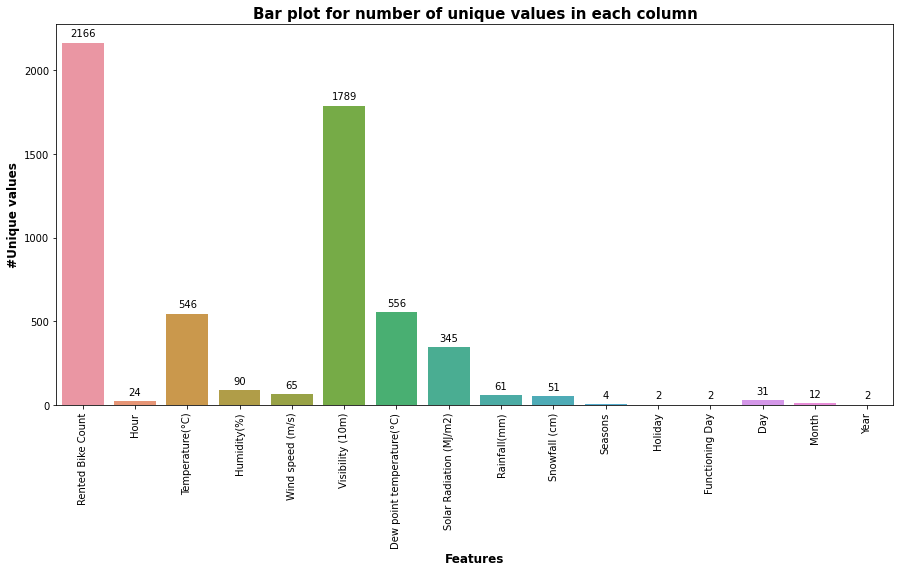

In [ ]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] =dataset.columns
unique=[]
for i in dataset.columns:
    unique.append(dataset[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Checking Correlation Of Data**

* Correlation is a statistical measure that expresses the strength of the relationship between two variables.

* The two main types of correlation : positive and negative.

* Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

* Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

* Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

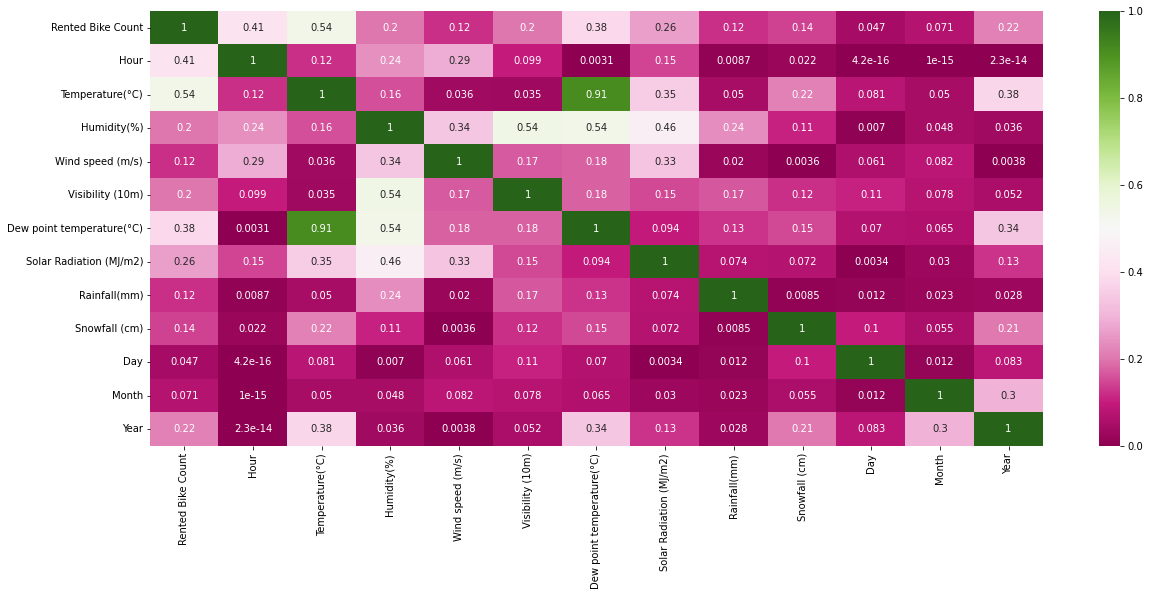

In [ ]:
plt.figure(figsize=(20,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='PiYG')
plt.show()

Temperature and Dew point temperature are almost 0.91 correlated, So it's generate multicollinearity issue. so we drop Dew point temperature feature

In [ ]:
#Drop Dew point temperature(°C) from dataset 
dataset.drop(columns=['Dew point temperature(°C)'],inplace=True) 

In [ ]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


**Seperate Numerical And Categorical Variables**

Categorical data is a type of data that is used to group information with similar characteristics.                         
Numerical data is a type of data that expresses information in the form of numbers.

In [ ]:
numerical_features = dataset.describe().columns
categorical_features = dataset.describe(include=['object','category']).columns

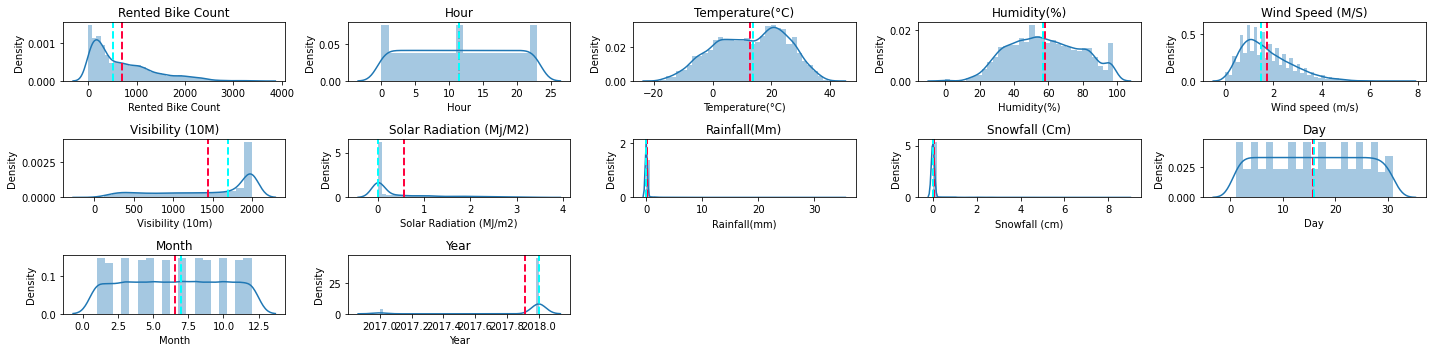

In [ ]:
#plot num data to analysis data distribution
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
  plt.subplot(3,5,index+1)
  sns.distplot(dataset[column])
  feature = dataset[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')
  plt.tight_layout()

In [ ]:
dataset.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.153428,0.853387
Hour,0.000000,-1.204176
Temperature(°C),-0.198326,-0.837786
Humidity(%),0.059579,-0.803559
Wind speed (m/s),0.890955,0.727179
Visibility (10m),-0.701786,-0.961980
Solar Radiation (MJ/m2),1.504040,1.126433
Rainfall(mm),14.533232,284.991099
Snowfall (cm),8.440801,93.803324
Day,0.007522,-1.193151


Right/Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)

Left/Negative Skewed Distribution: Mean < Median < Mode: visibility(10m)

In [ ]:
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
print(dataset['Seasons'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


In [ ]:
print(dataset['Holiday'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


In [ ]:
print(dataset['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


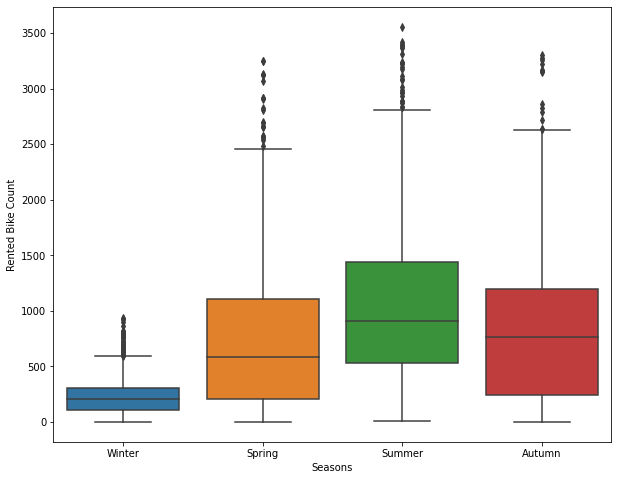

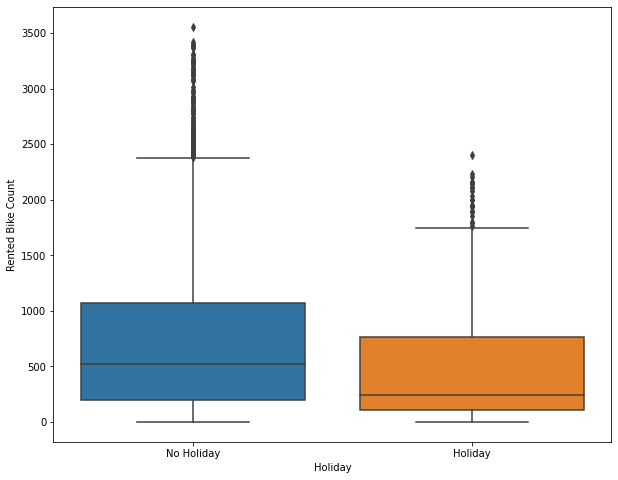

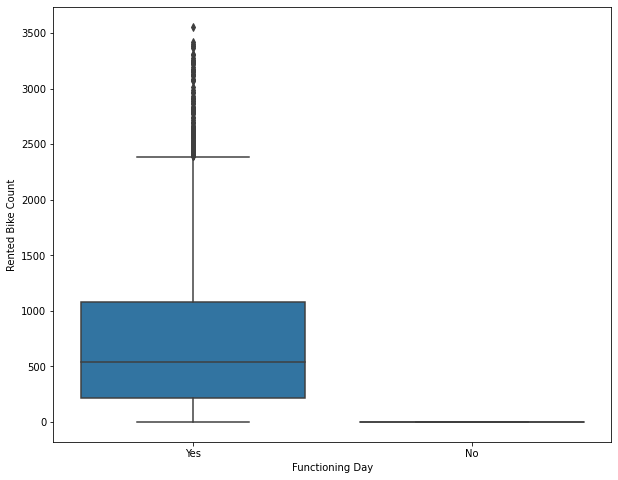

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

Conclusion

* Less demand on winter seasons
* Sligthly Higher demand during Non holidays
* Almost no demnad on non functioning day

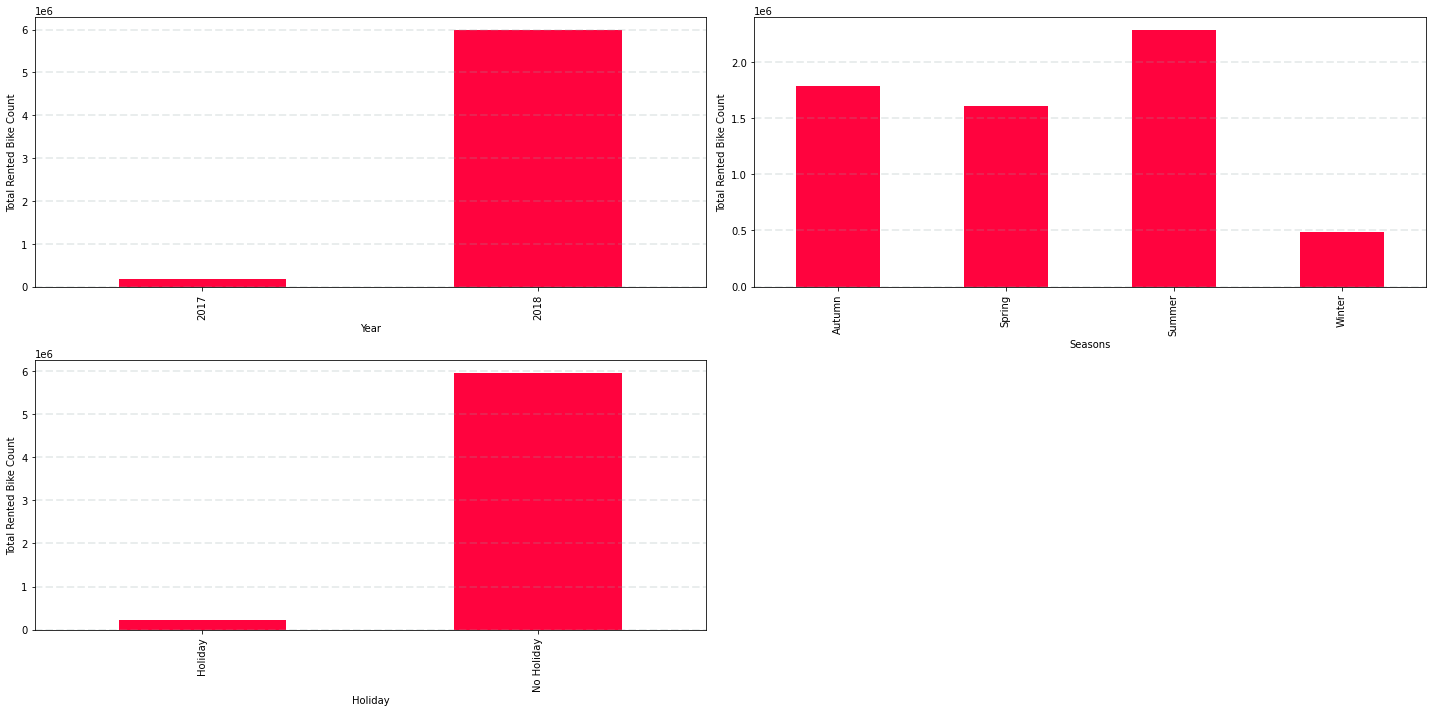

In [ ]:
# plot a barplot for the label by each categorical feature  
fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categorical_features) :
  plt.subplot(2,2,index+1)
  df1=df.copy()
  df1.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e") #kind=bar use for ploting barchart
  feature = df[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
  

Discrete Variables Count: 4


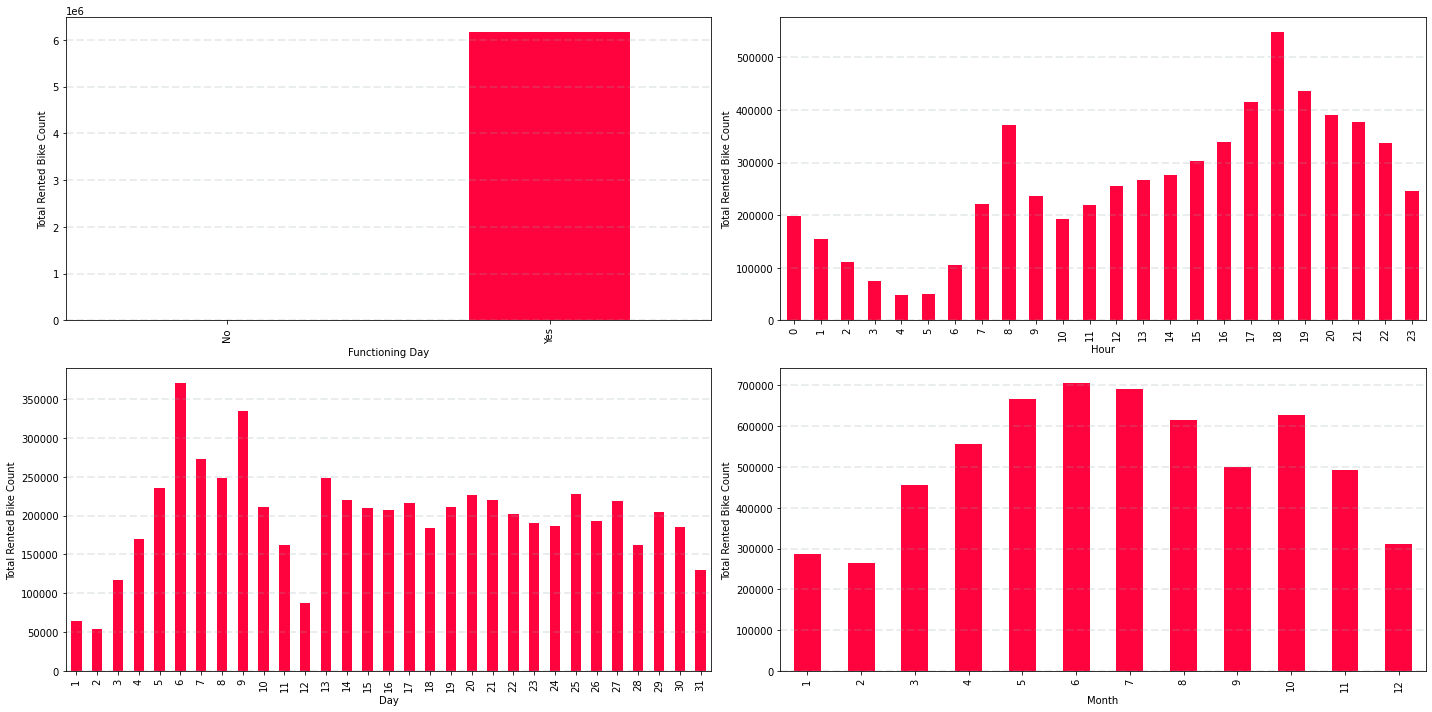

In [ ]:
## Lets analyse the discrete values by creating histograms to understand the distribution
num_discrete_value=[feature for feature in numerical_features if len(dataset[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,2,index+1)
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e") #kind=bar use for ploting barchart
  feature = dataset[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)

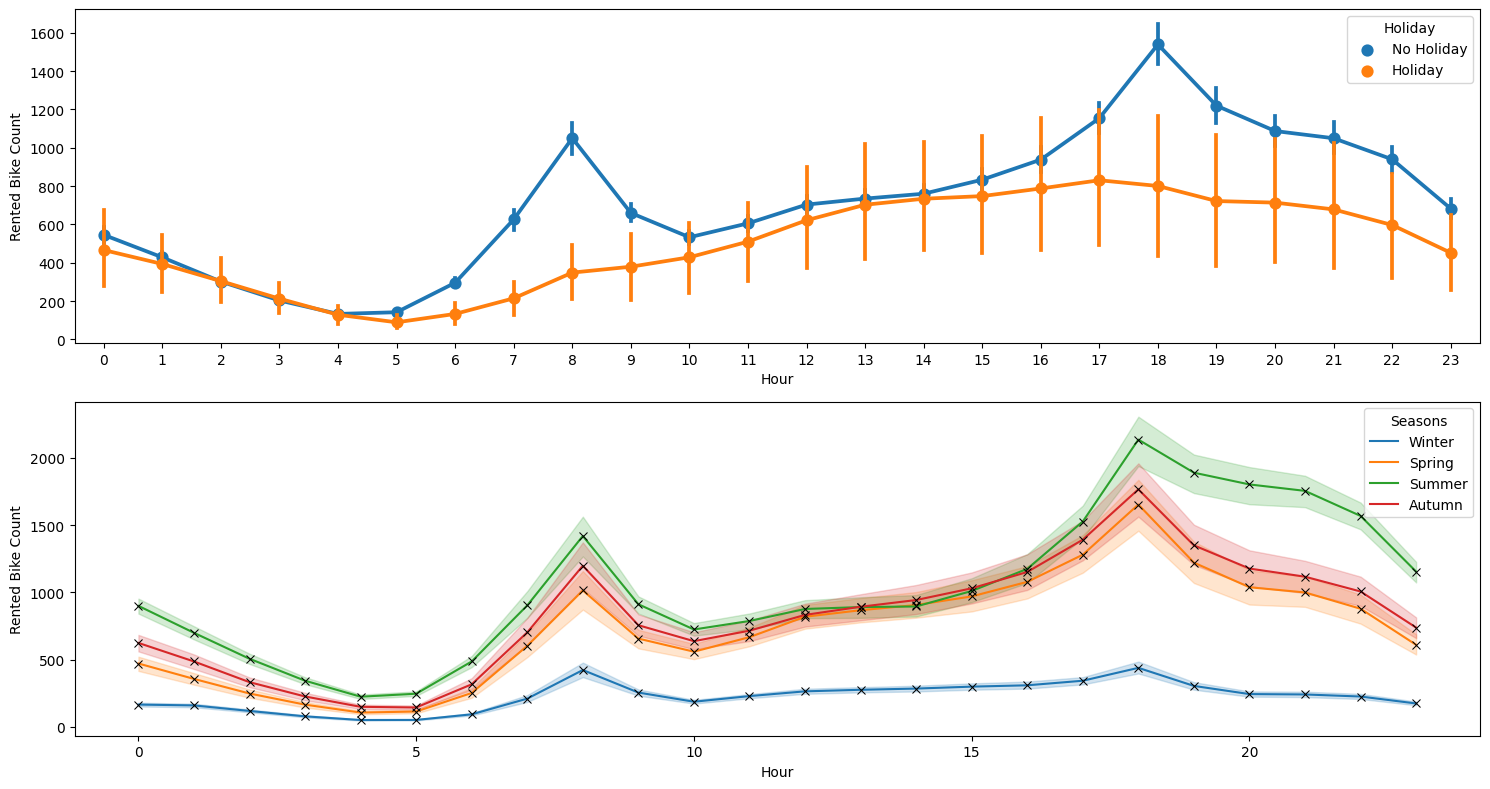

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

<Figure size 4000x1000 with 0 Axes>

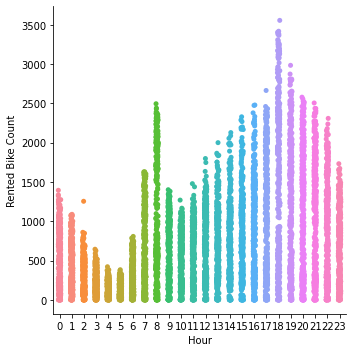

<Figure size 4000x1000 with 0 Axes>

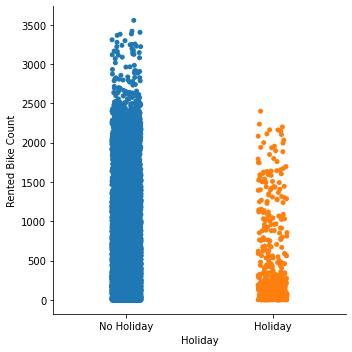

<Figure size 4000x1000 with 0 Axes>

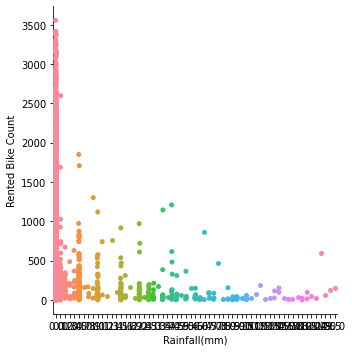

<Figure size 4000x1000 with 0 Axes>

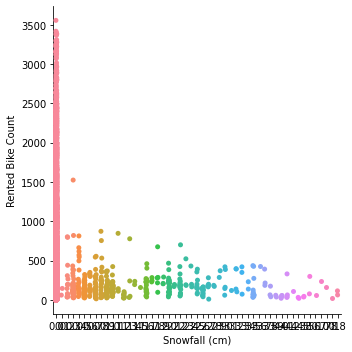

In [ ]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)']
for feature in feature_list:
  plt.figure(figsize=(20,5),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=dataset)
  plt.show()

Conclusion:

From hour v/s rented bike

* we can clearly see there is high demand of Rented bike between the office hours.

From working-nonworking v/s rented bike

* As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day.

From Rainfall v/s rented bike

* we can see that if Rainfall increase demand of Rented Bike Decreases.

From Snowfall v/s rented bike

* we can see that if Snowfall increase demand of Rented Bike Decreases.

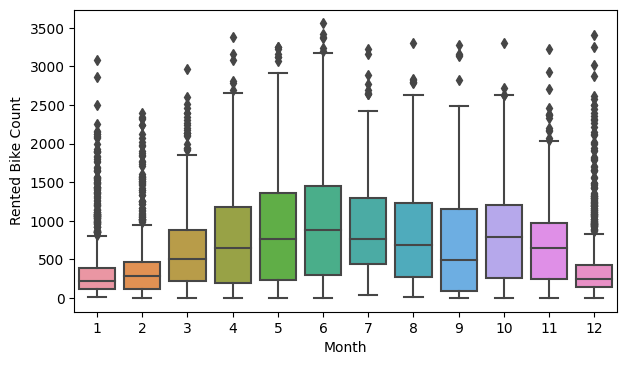

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='Month',y='Rented Bike Count',data=dataset)
plt.show()

Conclusion:

* we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

* Also demand of bike is maximum during May,june,july i.e Summer seasons

# Feature Engineering On Data

**Encode categorical data in both encoder and check accuracy of encoders**:

ohe_df : OneHotEncoder Data                                                                
le_df : LabelEncoder Data

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [ ]:
le_df= dataset.apply(le.fit_transform)

In [ ]:
le_df.groupby('Seasons').count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year
Seasons,,,,,,,,,,,,,,
0,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
1,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


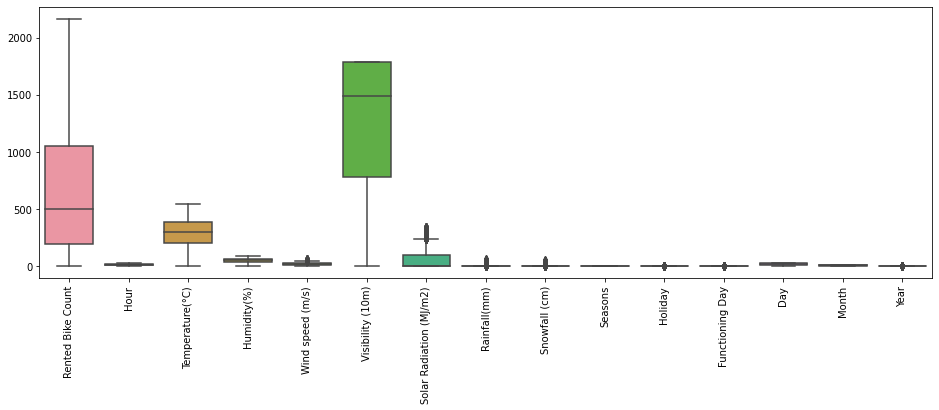

In [ ]:
#Checking Ditrubutation and Outliner on DataFrame
plt.figure(figsize=(16,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = le_df)    #box plot of le_df data frame raw data
plt.show()

In [ ]:
import scipy.stats as stats

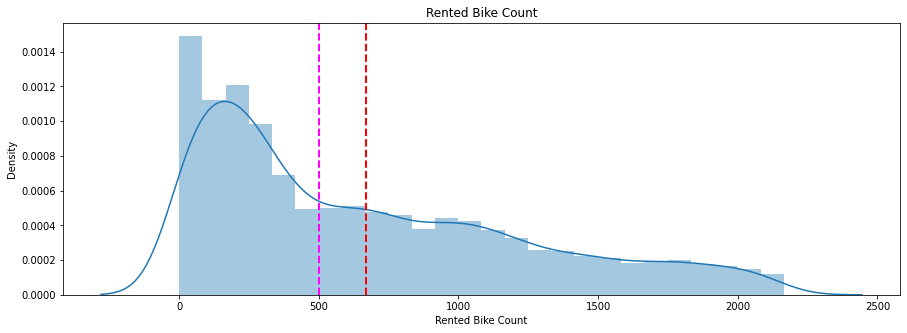

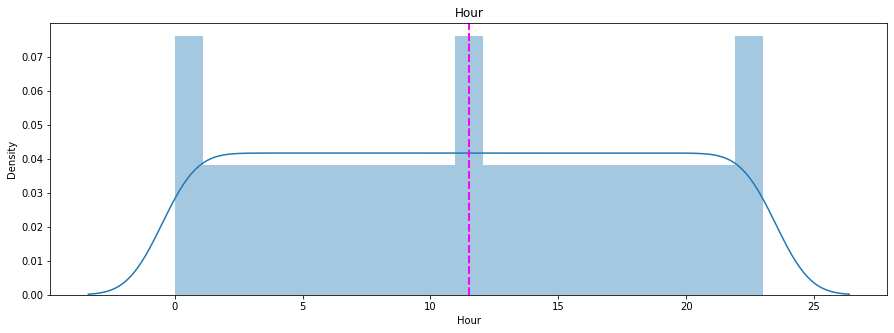

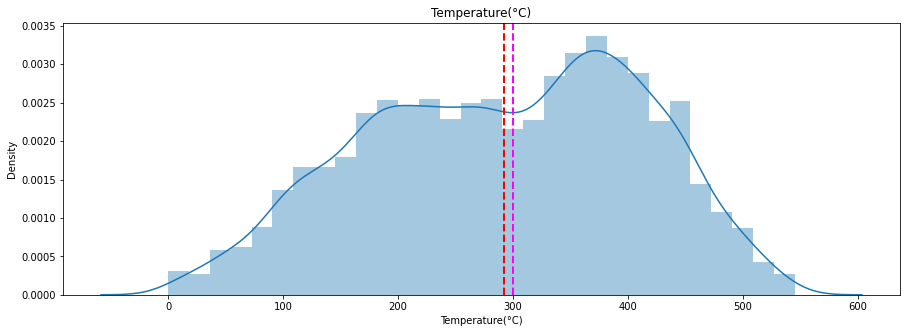

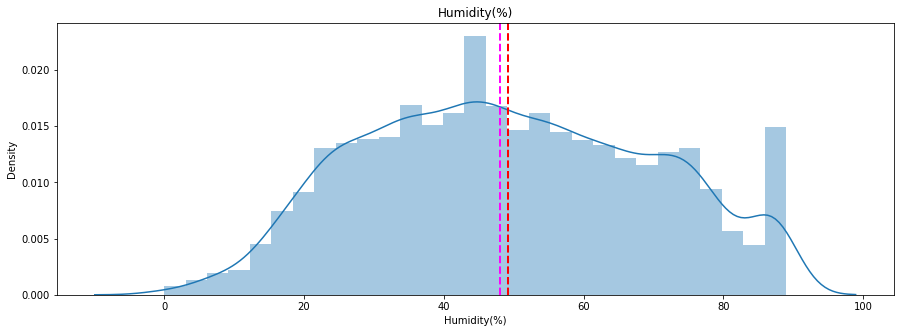

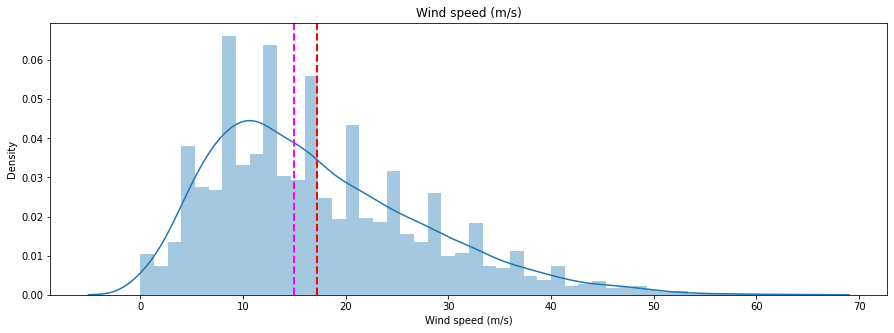

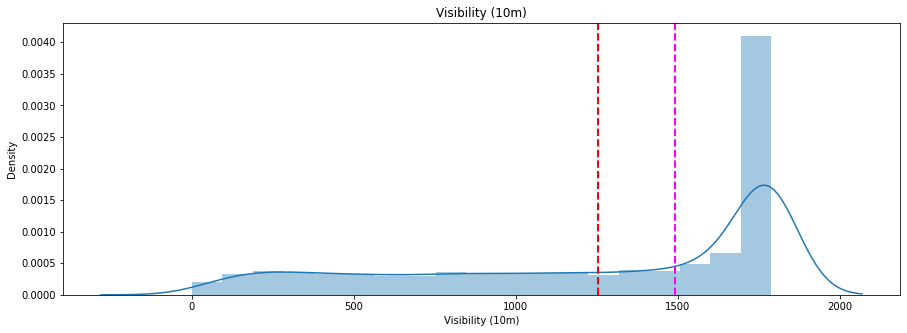

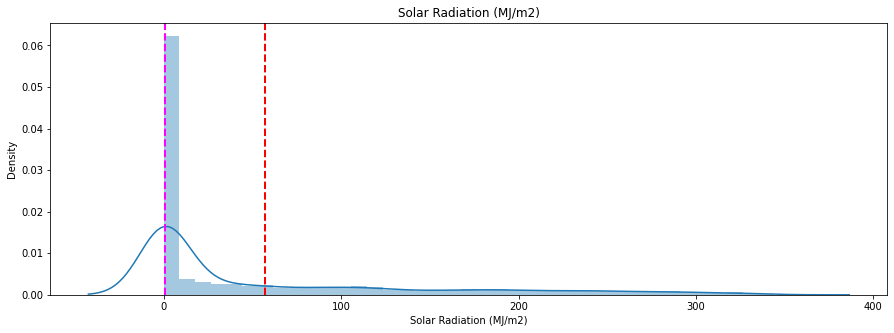

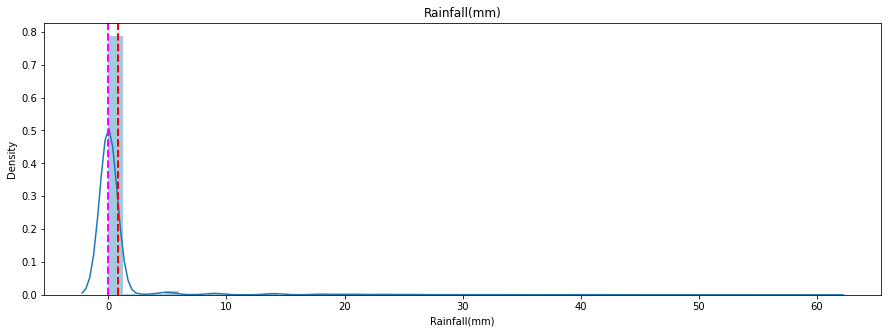

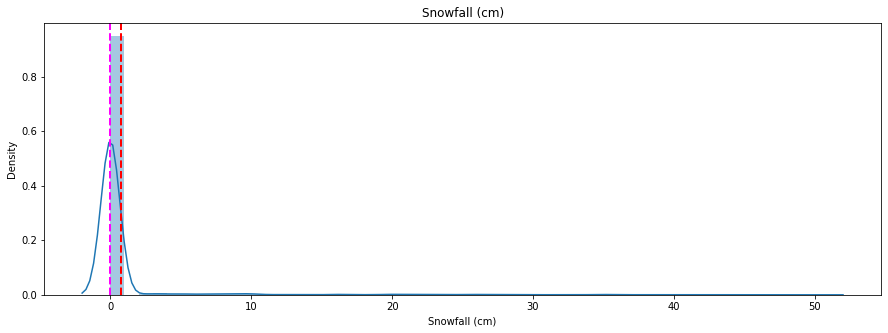

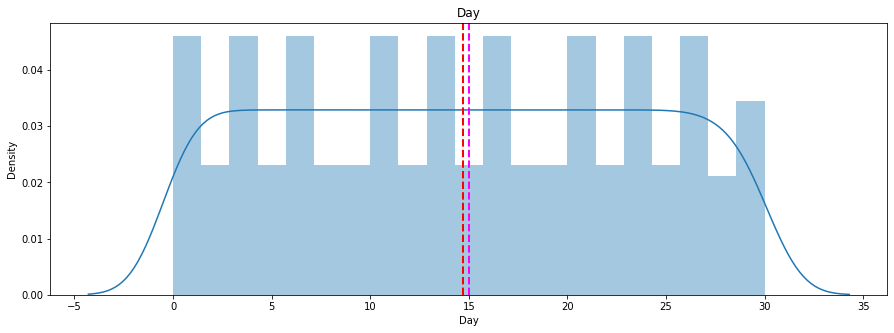

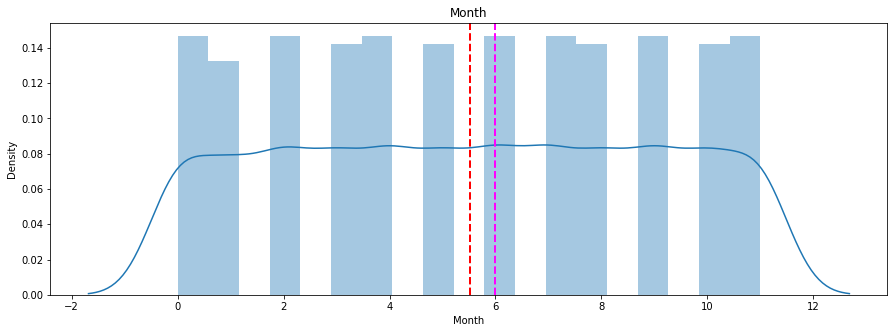

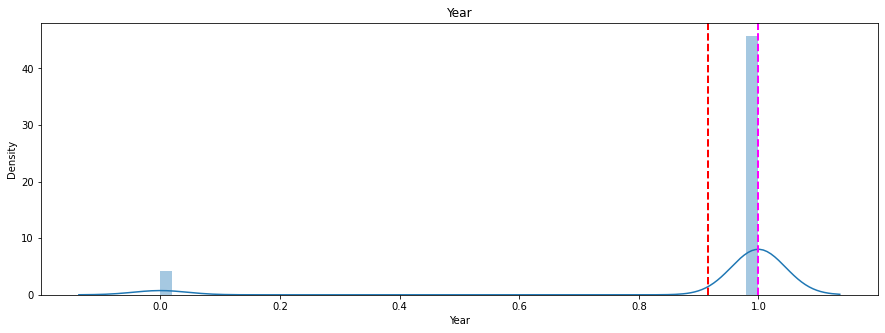

In [ ]:
# lets analyse the dist plot of feature 
for col in numerical_features:
  fig= plt.figure(figsize=(15,5))
  ax=fig.gca()
  feature = le_df[col]
  sns.distplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Our Rented Bike Count target is not normally distributed ,so we need to make some transformations before apply to the model

In [ ]:
def plotvariable(df,variable):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
    feature = le_df[variable]
    sns.distplot(feature)

    ##QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm',plot=plt)
    plt.show()

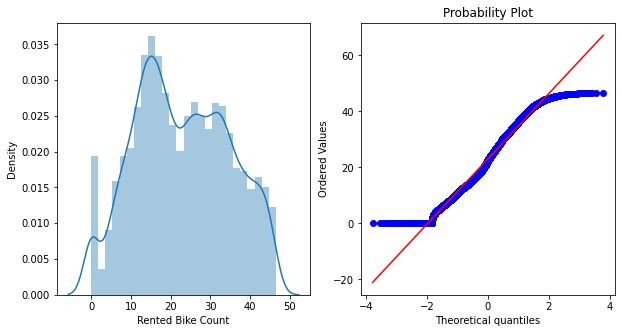

In [ ]:
# Apply sqrt transform for like Normal distributio in target varibale
le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])

plotvariable(le_df,'Rented Bike Count')

Now, Its Look Like Normal Distributation


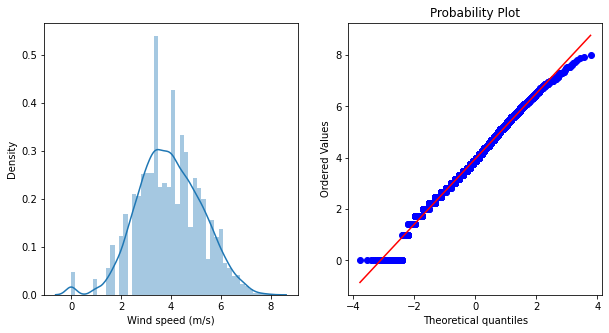

In [ ]:
# Apply sqrt transform for like Normal distributio in independent varibale(wind speed)
le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

plotvariable(le_df,'Wind speed (m/s)')

Now, Its Look Like Normal Distributation

# Functions


## Creating Function to train linear models and calculate scores

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [ ]:
# making a function to train and evaluate linear model
def tnt_model (model,X_train,y_train,X_test,y_test):

#training the model
  mm = model.fit(X_train,y_train)

  #predicting the values
  pred = mm.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

  



## Creating function to run diffirent models

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    mm= model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds =mm.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test**2,preds**2)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test**2,preds**2)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test**2,preds**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    #train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## Creating function to get feature importance

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## lime tablular

In [ ]:


pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=85ef2c54a757cf1fd5d960cf343c230895b2101da11dd8e409cb3cc366f0874c
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

# Spliting of Training and Testing Data

In [ ]:
# Identify the input columns (a list of column names)

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Shape of Training Data and Testing Data
print('Shape of Training Data and Testing Data ')                                                                                           
print('X_train-',X_train.shape)
print('X_test -',X_test.shape)
print('y_train -',y_train.shape)
print('y_test-',y_test.shape)

Shape of Training Data and Testing Data 
X_train- (7008, 14)
X_test - (1752, 14)
y_train - (7008,)
y_test- (1752,)


# Scalling and Model Building using Various Regression Technic

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regression

In [ ]:
lr = LinearRegression()



================Evalution Matrix=========================

MSE : 122612.82171875217
RMSE : 350.16113679098106
R2 : 0.6275808915385301
Adjusted R2 :  0.6245792406931296

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



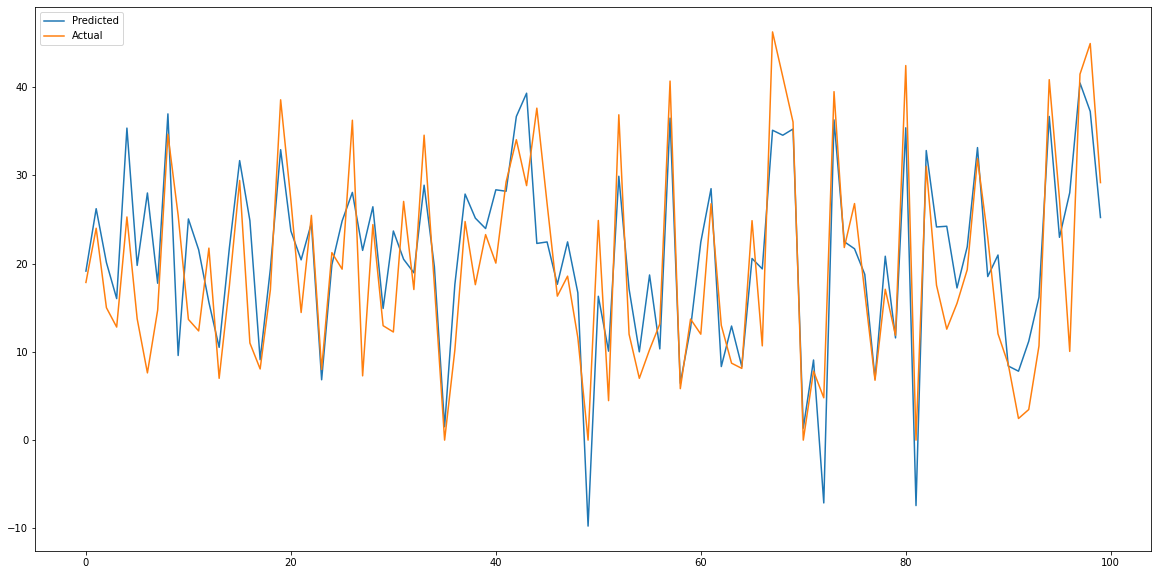

In [ ]:
tnt_model(lr, X_train, y_train, X_test, y_test)

# Regularisation

## Implementing Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 122612.82171875225
RMSE : 350.16113679098123
R2 : 0.6275808915385299
Adjusted R2 :  0.6245792406931294

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



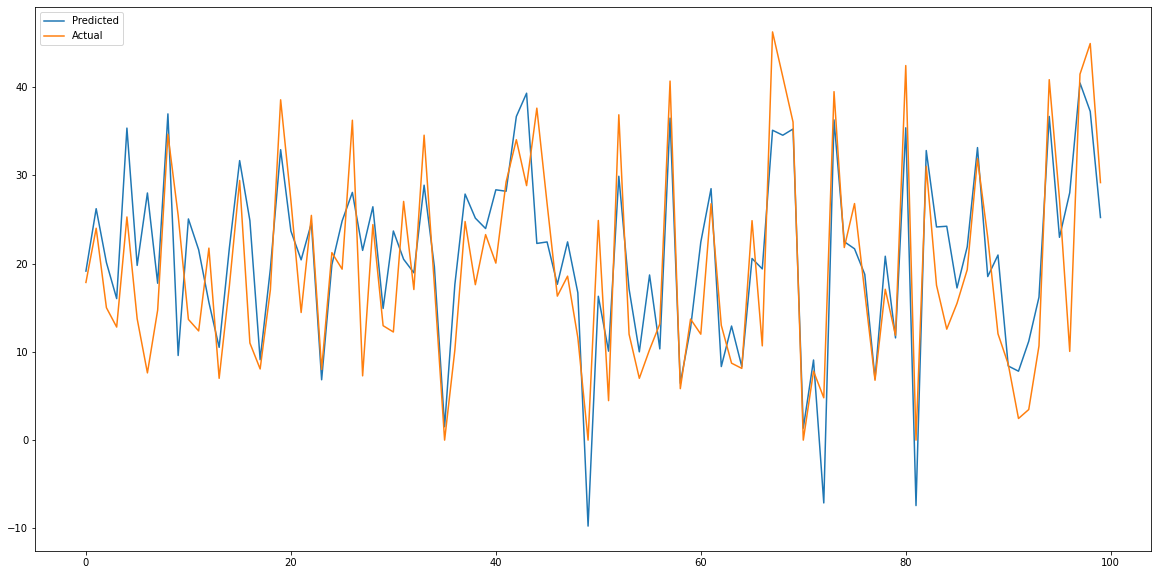

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
tnt_model(lasso_grid,X_train,y_train,X_test,y_test)

## Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)



================Evalution Matrix=========================

MSE : 122707.52217188077
RMSE : 350.29633479652733
R2 : 0.6272932523028396
Adjusted R2 :  0.6242892831216305

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



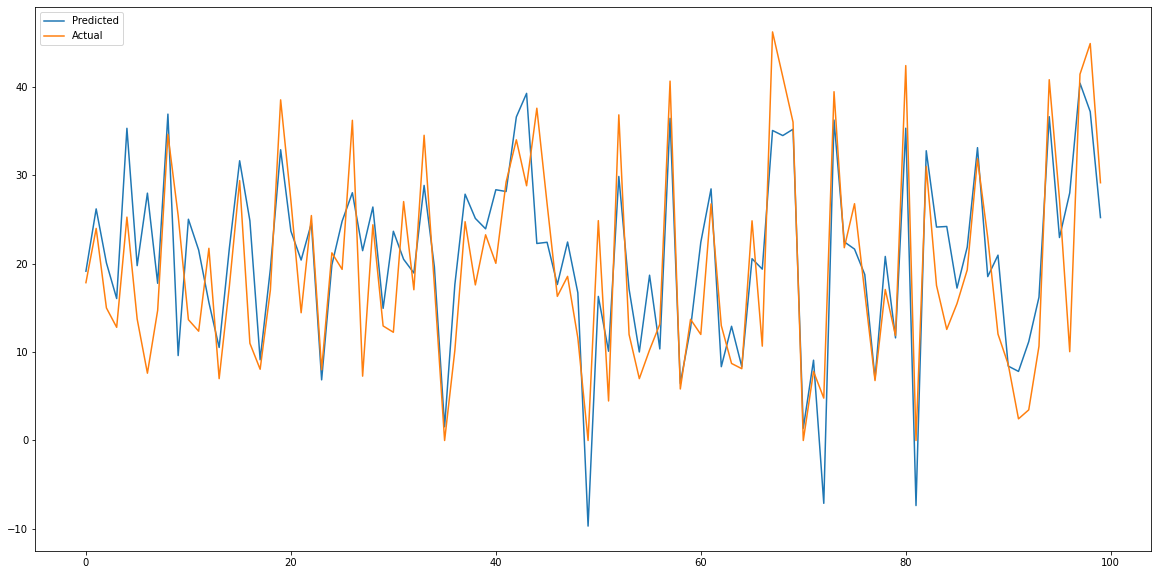

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

tnt_model(ridge_grid,X_train,y_train,X_test,y_test)

## Implementing ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 122619.00248662304
RMSE : 350.16996228492104
R2 : 0.6275621183300859
Adjusted R2 :  0.6245603161750031

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



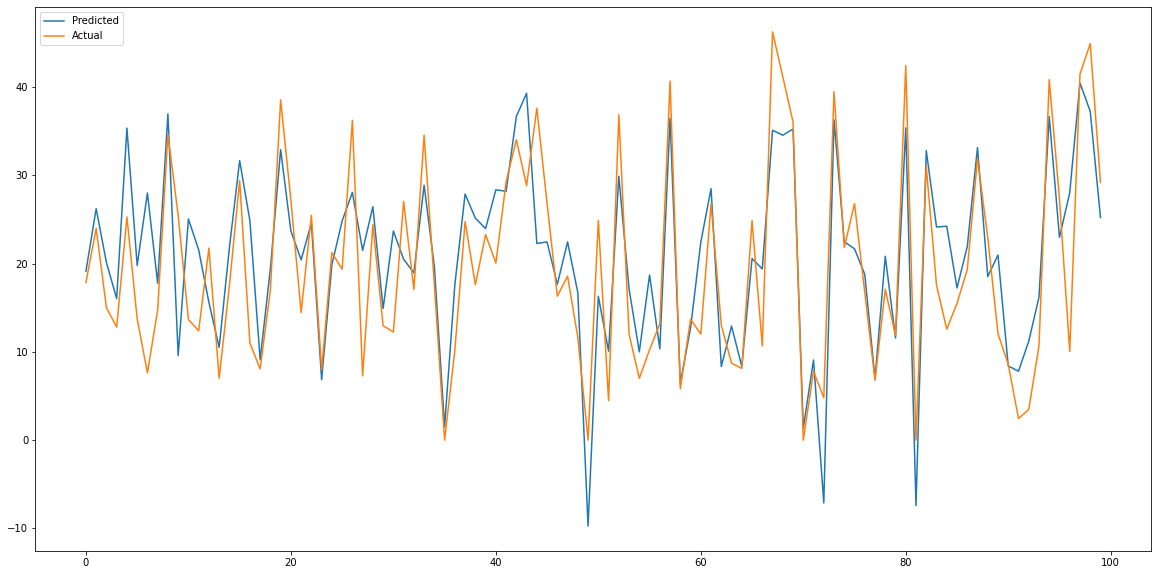

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
tnt_model(elastic_grid,X_train,y_train,X_test,y_test)


# Implementing  Polynomial Regressioin

In [ ]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 91784.72368001401
RMSE : 302.9599374174975
R2 : 0.7212168802239922
Adjusted R2 :  0.7189699235879161

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



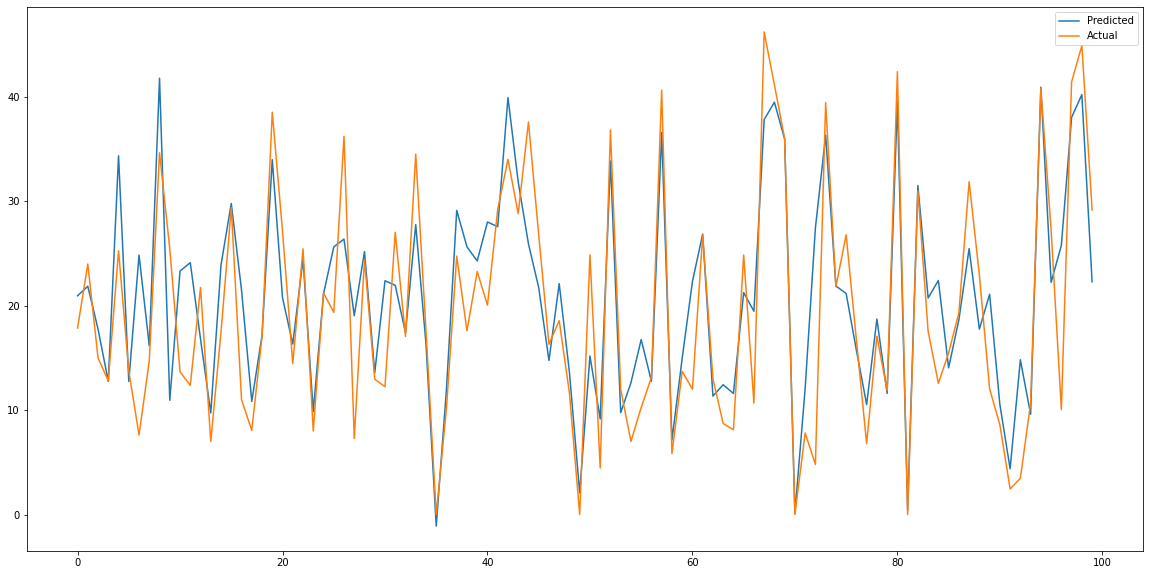

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
tnt_model(pipe,X_train,y_train,X_test,y_test)

# Implementing Regression in Tree based Mathod

In [ ]:
# Identify the input columns (a list of column names)

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Shape of Training Data and Testing Data
print('Shape of Training Data and Testing Data ')                                                                                           
print('X_train-',X_train.shape)
print('X_test -',X_test.shape)
print('y_train -',y_train.shape)
print('y_test-',y_test.shape)

Shape of Training Data and Testing Data 
X_train- (6570, 14)
X_test - (2190, 14)
y_train - (6570,)
y_test- (2190,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Implementing Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating decision tree model
dtr = DecisionTreeRegressor(random_state = 0)
dtr

DecisionTreeRegressor(random_state=0)


================Evalution Matrix=========================

MSE : 66885.26666666666
RMSE : 258.6218603804919
R2 : 0.7962511574151434
Adjusted R2 :  0.7949396706122983

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



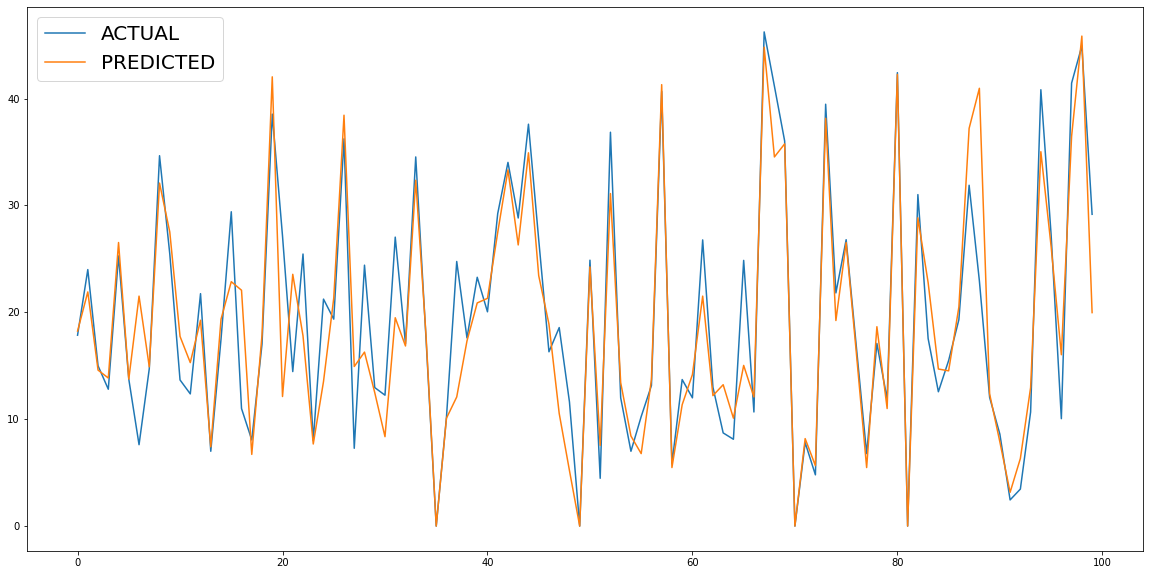

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(dtr,X_train_scaled,y_train,X_test_scaled,y_test)

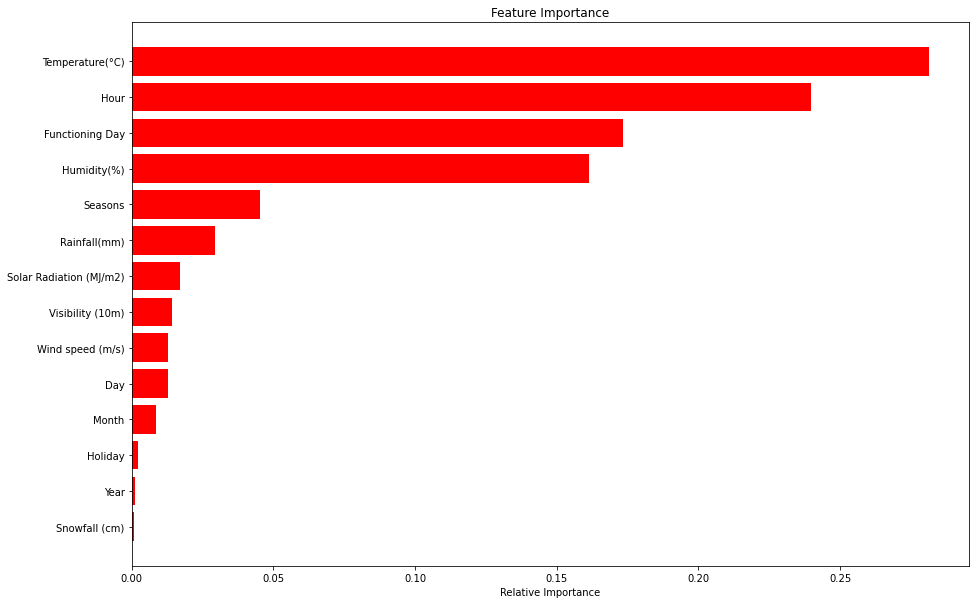

In [ ]:
#getting features importance of decision tree
get_features_importance(dtr,X_train)

# Implementing Random Forest Regressor Mathod

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rfr_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run random forest model with gridsearch
rf_grid= GridSearchCV(rfr_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 47665.26580906538
RMSE : 218.32376372961642
R2 : 0.8547999697975845
Adjusted R2 :  0.8538653489135231

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



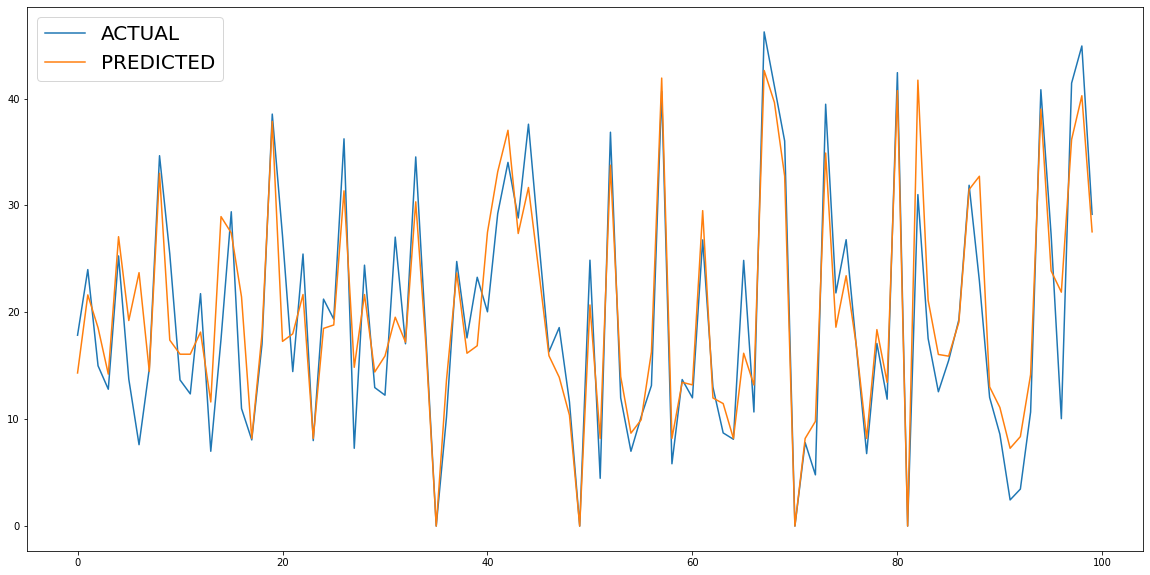

In [ ]:
#calling run_model to train,fit and evalution of random forest model
run_model(rf_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Gradient Boosting

In [ ]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 44236.4438443351
RMSE : 210.32461540279849
R2 : 0.8652449981507644
Adjusted R2 :  0.8643776096331142

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



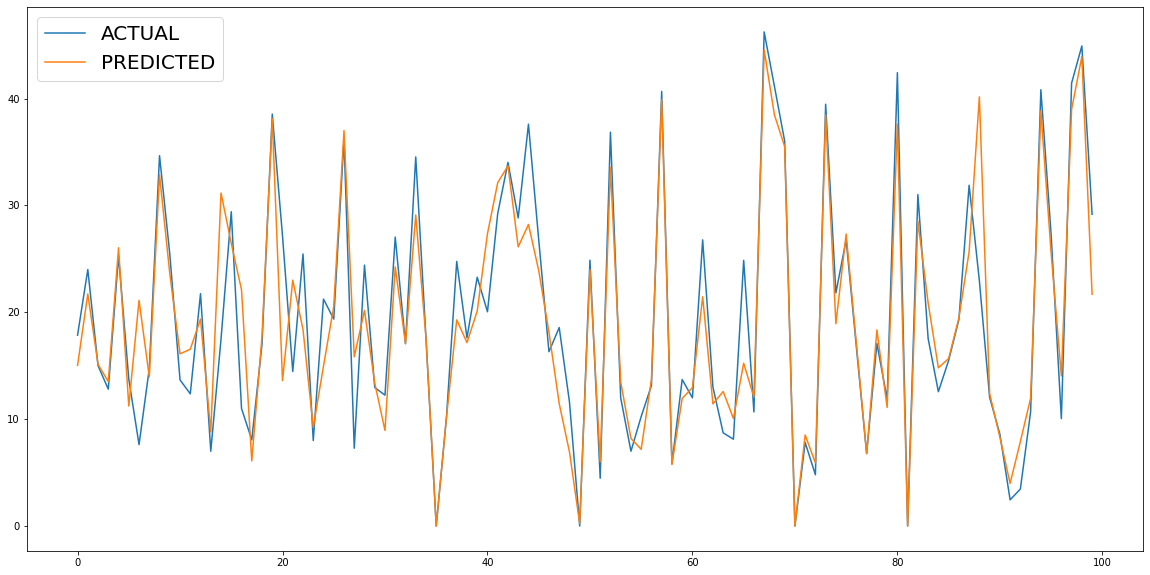

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Implementing Extreme Gradient Boosting (XGBoost) Ensemble Techinc

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[13:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

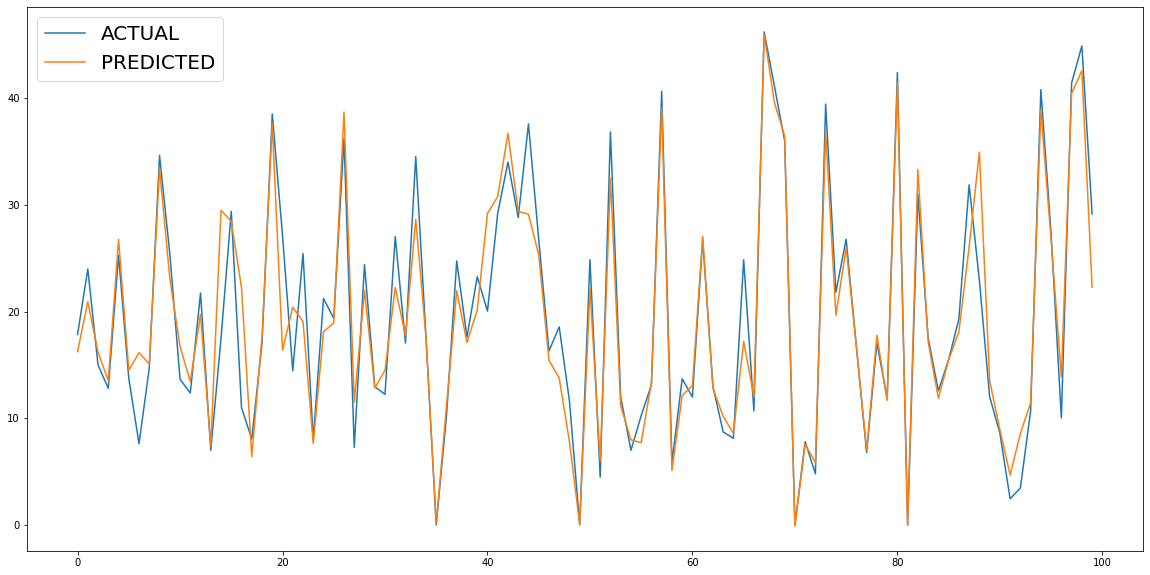

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

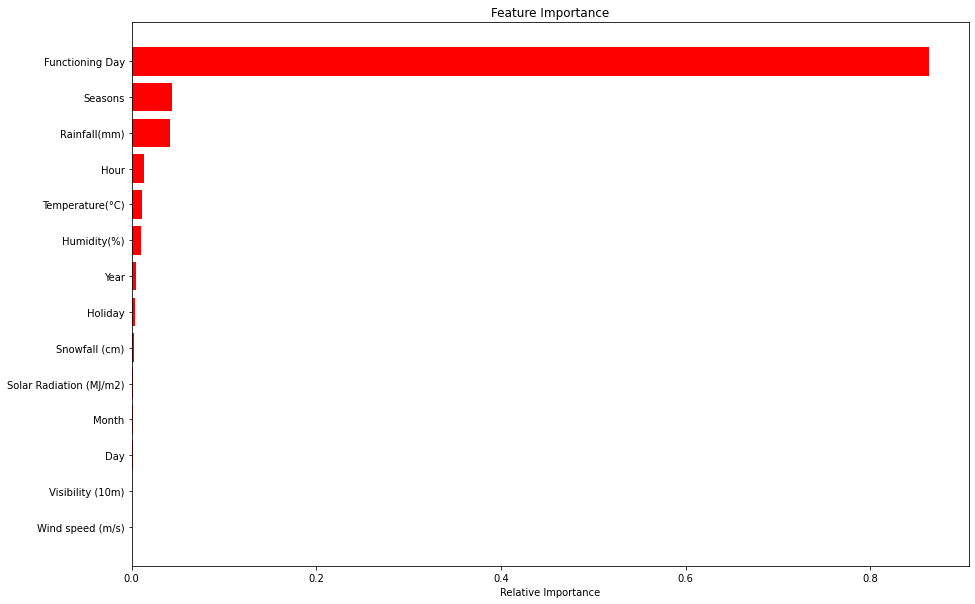

In [ ]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

# Combine Evalution Matrix of All Model 

In [ ]:
# Creating dictionary to store all the metrices 
model_matrices_dict={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [ ]:
# list of all model 
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB']

In [ ]:
# Converting dictionary to dataframe for Easy Visualization
matrices_df=pd.DataFrame.from_dict(model_matrices_dict,orient='index',columns=model_name)

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,122612.821719,350.161137,0.627581,0.624579
1,Lasso,122612.821719,350.161137,0.627581,0.624579
2,Ridge,122707.522172,350.296335,0.627293,0.624289
3,Elasticnet,122619.002487,350.169962,0.627562,0.624560
4,Polynomial,91784.723680,302.959937,0.721217,0.718970
5,Decision_Tree,66885.266667,258.621860,0.796251,0.794940
6,Random_Forest,47665.265809,218.323764,0.854800,0.853865
7,Gradient_Boosting,44236.443844,210.324615,0.865245,0.864378
8,Xtreme_GB,32714.972085,180.872806,0.900342,0.899701


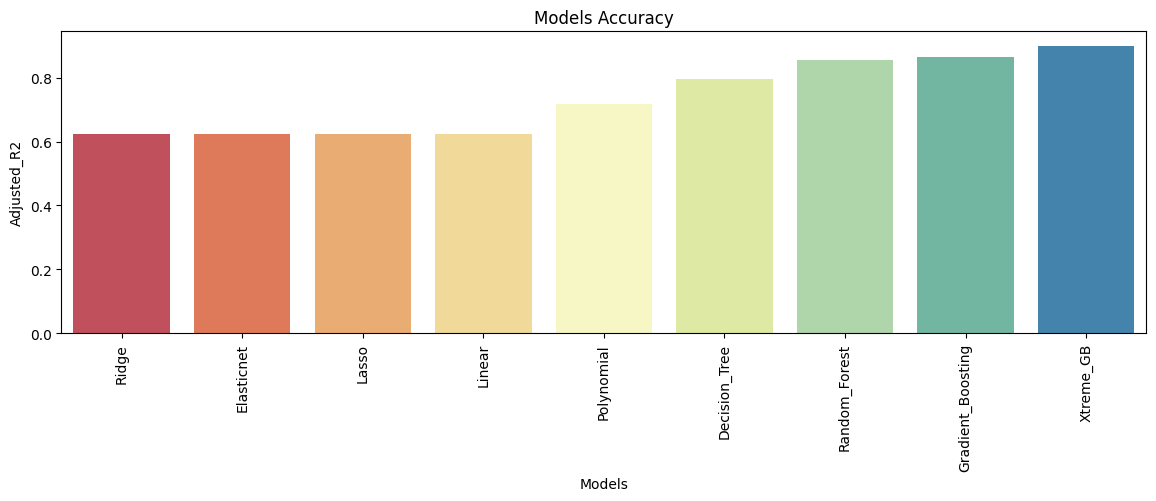

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette='Spectral').set(title='Models Accuracy')
plt.xticks(rotation=90);

#Conclusion

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After performing the various models the Gradient Boosting and Extreme Gradient Boosting found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Gradient Boosting and Extreme Gradient Boosting models !

9.We can use either Gradient Boosting and Extreme Gradient Boosting model for the bike rental stations.